# Praktek ketiga : Menguji Hasil Prediksi (Confusion Matrix dan kurva ROC)

## Import Library

In [1]:
import tensorflow as tf  # Library untuk membangun dan melatih model deep learning
from tensorflow.keras import Sequential, layers  # Modul untuk membuat model sequential dan lapisan
import numpy as np  # Library untuk operasi numerik
import matplotlib.pyplot as plt  # Library untuk visualisasi grafik
from sklearn import metrics  # Modul untuk menghitung metrik evaluasi
import seaborn as sns  # Library untuk visualisasi confusion matrix yang lebih menarik


## Memuat dataset MNSIT

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Memuat dataset MNSIT: 60.000 data latih dan 10.000 data uji, berisi gambar digit 0-9

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Normalisasi data
x_train = x_train / 255.0  # Mengubah nilai piksel dari 0-255 menjadi 0-1 untuk normalisasi
x_test = x_test / 255.0  # Normalisasi data uji dengan cara yang sama
x_train = x_train[:, :, :, np.newaxis]  # Menambah dimensi kanal (28x28x1) untuk CNN
x_test = x_test[:, :, :, np.newaxis]  # Menambah dimensi kanal untuk data uji

## Mendefinisikan model CNN sederhana

In [4]:
model = Sequential()  # Membuat model sequential (lapisan ditumpuk berurutan)
model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Lapisan konvolusi: 16 filter ukuran 3x3, aktivasi ReLU, input gambar 28x28x1
model.add(layers.MaxPooling2D(pool_size=(2,2)))  # Lapisan pooling untuk mengurangi dimensi
model.add(layers.Flatten())  # Mengubah output 2D menjadi vektor 1D
model.add(layers.Dense(128, activation='relu'))  # Lapisan dense dengan 128 neuron
model.add(layers.Dense(10, activation='softmax'))  # Lapisan output untuk 10 kelas (digit 0-9)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Mengompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Mengatur optimizer adam, fungsi loss untuk klasifikasi multi-kelas, dan metrik akurasi

In [6]:
# Melatih model
model.fit(x_train, y_train, epochs=5)  # Melatih model dengan data latih selama 5 epoch

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8985 - loss: 0.3400
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0614
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0227
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9949 - loss: 0.0156


## Membuat prediksi

In [7]:
predictions = model.predict(x_test)  # Mendapatkan probabilitas prediksi untuk data uji
y_pred = np.argmax(predictions, axis=1)  # Mengambil label prediksi dengan probabilitas tertinggi


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [8]:
# Menghitung confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # Membuat matriks kebingungan dari label asli dan prediksi


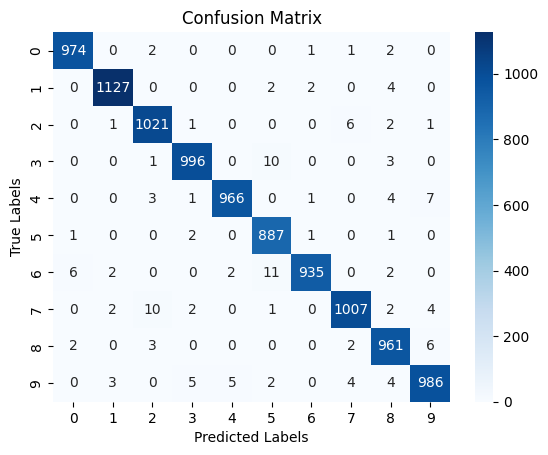

In [9]:
# Memplot confusion matrix
plt.figure()  # Membuat figure baru untuk visualisasi
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Membuat heatmap dengan angka di dalam sel
ax.set_title('Confusion Matrix')  # Memberi judul pada plot
ax.set_xlabel('Predicted Labels')  # Label sumbu x untuk prediksi
ax.set_ylabel('True Labels')  # Label sumbu y untuk label asli
plt.show()  # Menampilkan plot confusion matrix

In [10]:
# Menghitung metrik evaluasi
accuracy = metrics.accuracy_score(y_test, y_pred)  # Menghitung akurasi keseluruhan
recall = metrics.recall_score(y_test, y_pred, average='macro')  # Recall rata-rata untuk semua kelas
precision = metrics.precision_score(y_test, y_pred, average='macro')  # Precision rata-rata untuk semua kelas
f1 = metrics.f1_score(y_test, y_pred, average='macro')  # F1 score rata-rata untuk semua kelas
print(f'Akurasi: {accuracy:.4f}')  # Mencetak akurasi dengan 4 desimal
print(f'Recall: {recall:.4f}')  # Mencetak recall dengan 4 desimal
print(f'Precision: {precision:.4f}')  # Mencetak precision dengan 4 desimal
print(f'F1 Score: {f1:.4f}')  # Mencetak F1 score dengan 4 desimal

Akurasi: 0.9860
Recall: 0.9860
Precision: 0.9859
F1 Score: 0.9859


## Memplot kurva ROC untuk setiap kelas

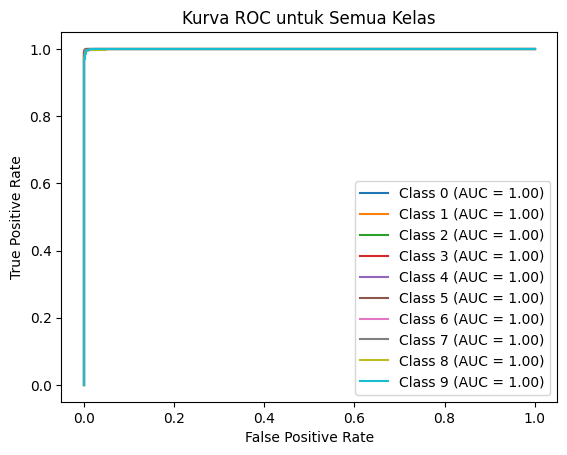

In [11]:
plt.figure()  # Membuat figure baru untuk kurva ROC
for class_num in range(10):  # Loop untuk 10 kelas (digit 0-9)
    true_labels_k = (y_test == class_num).astype(int)  # Label biner: 1 jika kelas benar, 0 jika salah
    pred_probs_k = predictions[:, class_num]  # Probabilitas prediksi untuk kelas tersebut
    fpr, tpr, _ = metrics.roc_curve(true_labels_k, pred_probs_k)  # Menghitung False Positive Rate dan True Positive Rate
    roc_auc = metrics.auc(fpr, tpr)  # Menghitung Area Under Curve (AUC)
    plt.plot(fpr, tpr, label=f'Class {class_num} (AUC = {roc_auc:.2f})')  # Memplot kurva ROC per kelas
plt.title('Kurva ROC untuk Semua Kelas')  # Memberi judul pada plot ROC
plt.xlabel('False Positive Rate')  # Label sumbu x
plt.ylabel('True Positive Rate')  # Label sumbu y
plt.legend()  # Menampilkan legenda untuk setiap kelas
plt.show()  # Menampilkan plot kurva ROC